# Kunskapskontroll

### Fyll i uppgifterna nedan innan du lämnar in på LearnPoint: 
Namn på samtliga gruppmedlemmar: 

Marcus Turesson, Pontus Paulsson, Jonathan Karlsson, Rasmus Hellgren, Tommy Wang

# Code

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [17]:
# Below, set your own path where you have stored the data file. 
housing = pd.read_csv("housing.csv")

In [18]:
raw_df = pd.DataFrame(housing)

## EDA

In [19]:
raw_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df = raw_df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Total_bedrooms is missing values so we are dropping those columns to clean the dataset

### Remove all houses where price is 500001

In [22]:
less_than_500001 = df[df["median_house_value"] <= 500000]
# Check so that it worked
less_than_500001[less_than_500001["median_house_value"] > 500000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [23]:
df = less_than_500001
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Change ocean_proximity to 

In [24]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     8505
INLAND        6469
NEAR OCEAN    2419
NEAR BAY      2077
ISLAND           5
Name: count, dtype: int64

In [25]:
df = df.join(pd.get_dummies(df.ocean_proximity)).drop(["ocean_proximity"], axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


### View a graph of all houses

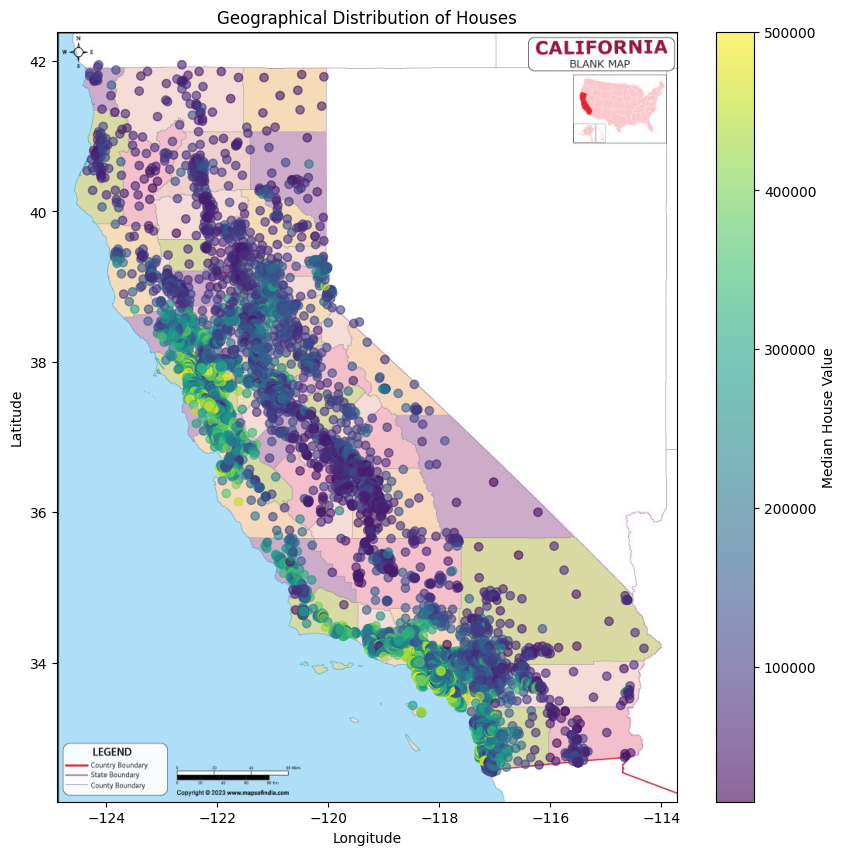

In [26]:
plt.figure(figsize=(10, 10))

# Backgroud image
background_img = mpimg.imread('./pictures/california-map.jpg')
extent = [-124.48, -114.13, 32.53, 42.01]
scale_factor = 1.08  # Adjust the scale factor as needed for the desired enlargement
new_extent = [
    extent[0] - (extent[1] - extent[0]) * (scale_factor - 1) / 2,
    extent[1] + (extent[1] - extent[0]) * (scale_factor - 1) / 2,
    extent[2] - (extent[3] - extent[2]) * (scale_factor - 1) / 2,
    extent[3] + (extent[3] - extent[2]) * (scale_factor - 1) / 2
]
plt.imshow(background_img, extent=new_extent, aspect='auto')

# Scatter plot
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Houses')
plt.show()

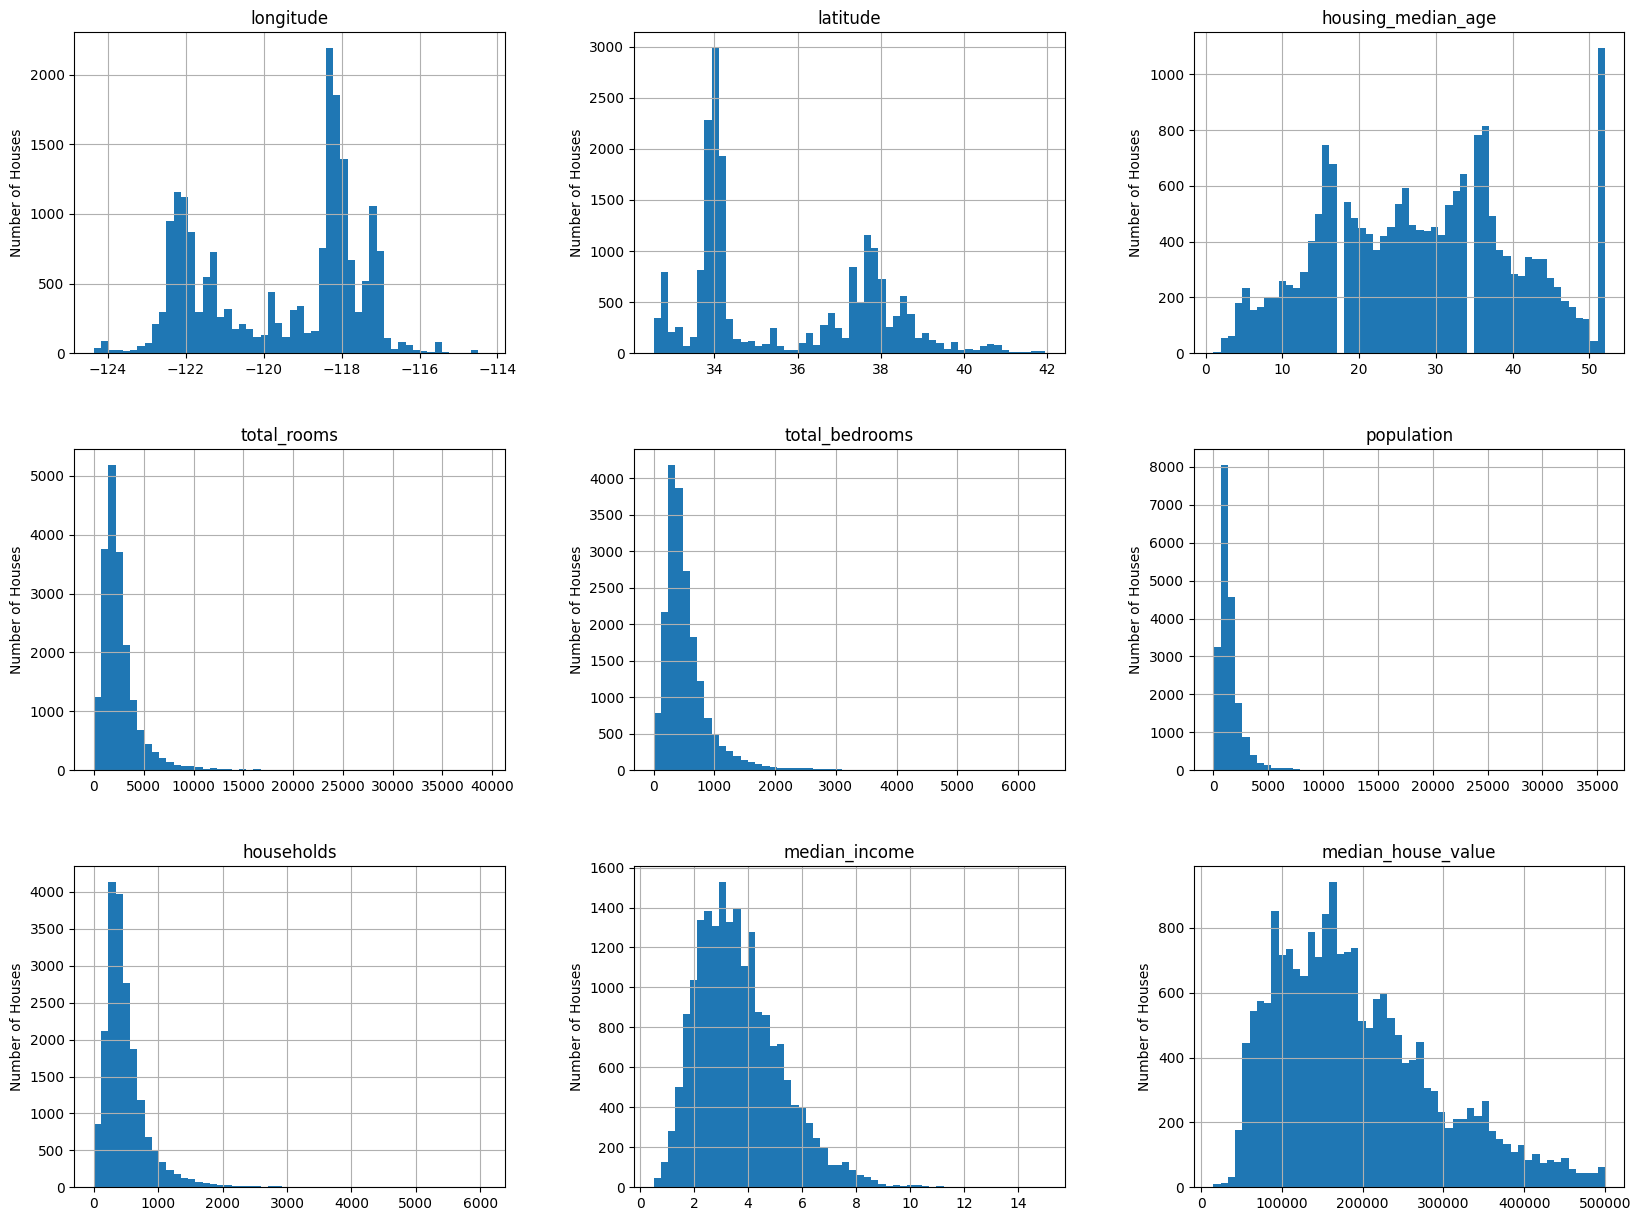

In [27]:
# Histogrammen hjälper till att förstå fördelningen och spridningen av de numeriska variablerna i datasetet.

df.hist(bins=54, figsize=(20, 15)) # Skapar histogram för alla numeriska kolumner i df och en figurstorlek på 20x15.

for ax in plt.gcf().axes:
    ax.set_ylabel('Number of Houses')

plt.show()

### Heatmap av all correlation

<Axes: >

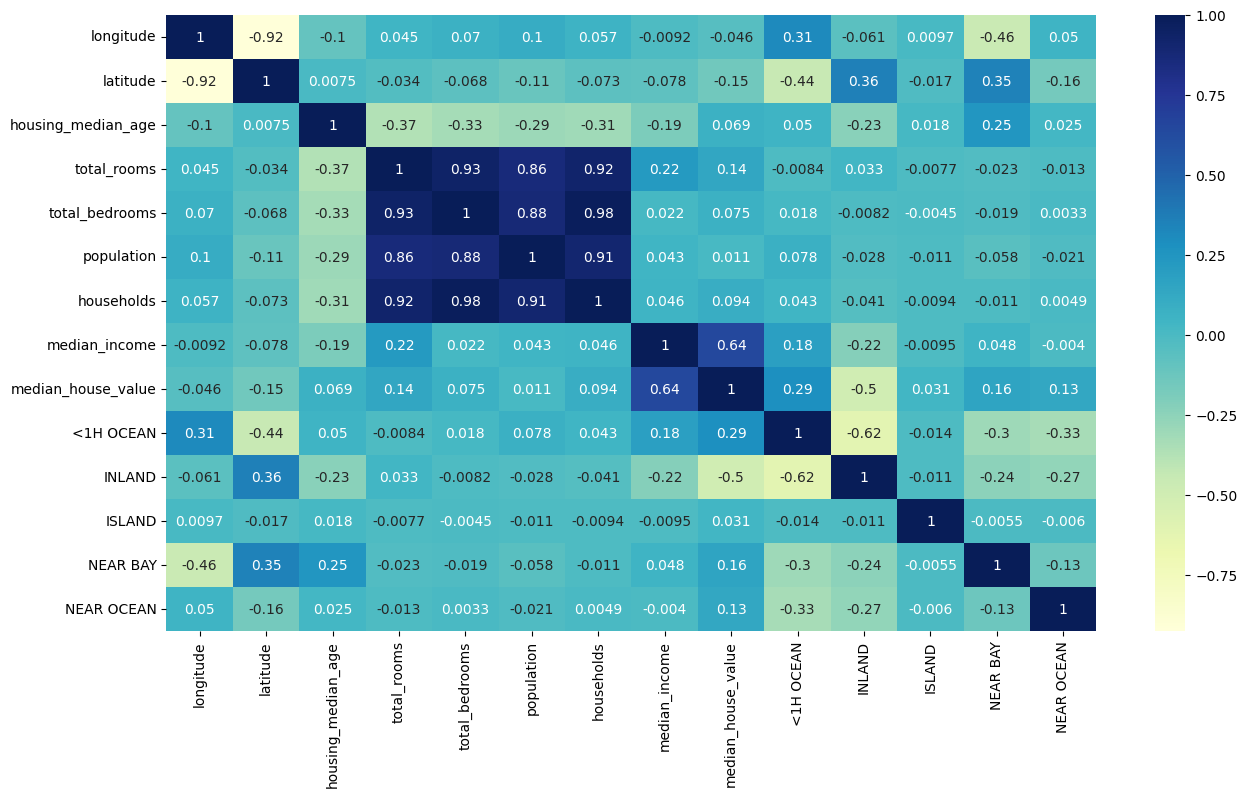

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

#### Vi ser här att median_house_value har rätt hög correlation med median_income

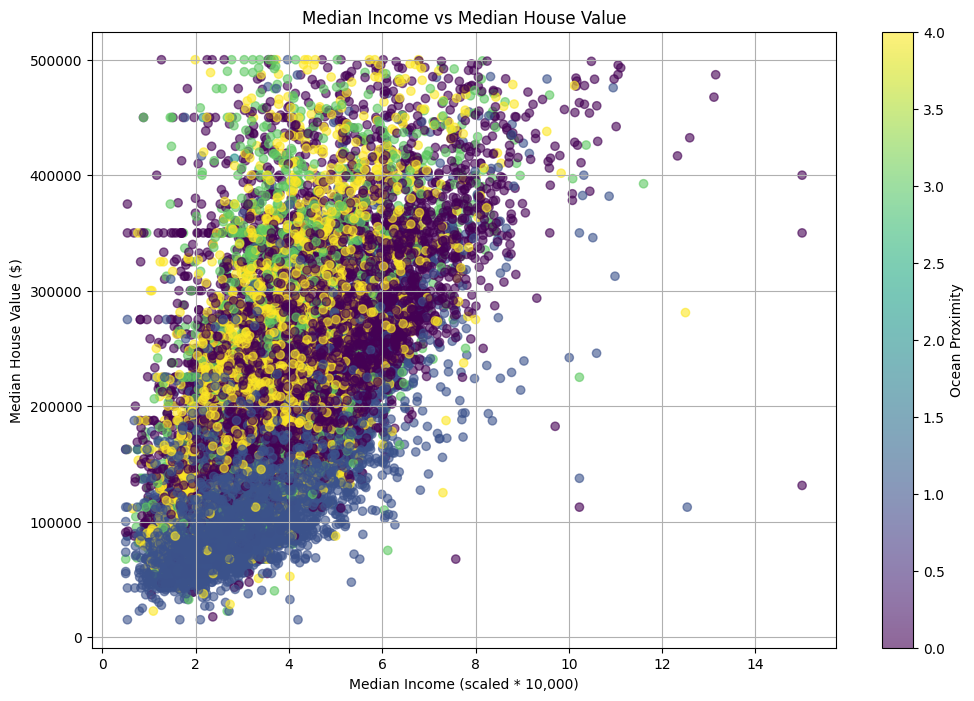

In [29]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['median_income'], df['median_house_value'], 
                      c=df[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']].idxmax(1).astype('category').cat.codes, 
                      cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Ocean Proximity')
plt.xlabel('Median Income (scaled * 10,000)')
plt.ylabel('Median House Value ($)')
plt.title('Median Income vs Median House Value')
plt.grid(True)

plt.show()

In [30]:
#X = housing.drop(columns=['median_house_value'], axis=1)
#y = housing['median_house_value']
#X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.2, random_state=56)

In [31]:
# Assuming df is your DataFrame
# Let's select the relevant columns for the features and target variable
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'median_income']]
y = df['median_house_value'] 

In [ ]:
X_train.head()

In [ ]:
X_train.describe()

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(housing)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("\nTraining data size:", X_train.shape)
print("Testing data size:", X_test.shape)

In [ ]:
# Fit the training data to a Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Show your regression model's score
train_score = regression_model.score(X_train, y_train)
test_score = regression_model.score(X_test, y_test)
print(f'\nTraining score: {train_score}')
print(f'Testing score: {test_score}')

In [ ]:
# Get the coefficients and intercept of the trained regression model
coefficients = regression_model.coef_
intercept = regression_model.intercept_

# Select three samples from the testing set
samples_to_predict = X_test

# Manually calculate the predictions without using loops
predictions = np.dot(samples_to_predict.values, coefficients.reshape(-1, 1)).flatten() + intercept

# Get the actual data for the selected samples from the dataset
actual_data = y_test

# Print the predictions and actual data
for pred, actual in zip(predictions, actual_data):
    print("Prediction:", pred)
    print("Actual data:", actual)
    acc = regression_model.score(X_test, y_test)
    print(acc*100, '%')
    print()